In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.drop(["Id", "SepalLengthCm", "SepalWidthCm", "Species"], axis=1, inplace=True)
df

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


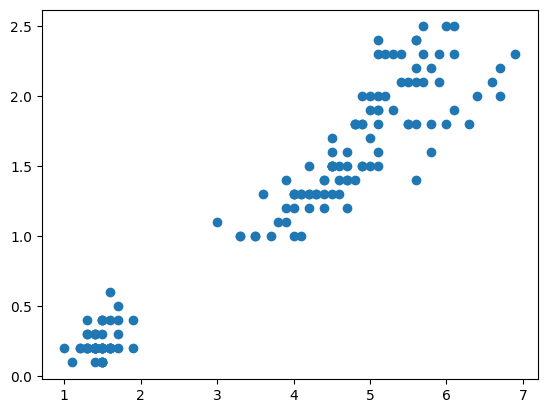

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df.PetalLengthCm, df.PetalWidthCm)


In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

y_pred = model.fit_predict(df[["PetalLengthCm", "PetalWidthCm"]])
df["clusters"] = y_pred
df

C:\Users\ok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PetalLengthCm,PetalWidthCm,clusters
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [19]:
df["clusters"].unique()

array([1, 2, 0])

In [31]:
df0 = df[df.clusters==0]
df1 = df[df.clusters==1]
df2 = df[df.clusters==2]

In [32]:
model.cluster_centers_

array([[ 1.46400000e+00,  2.44000000e-01,  1.00000000e+00],
       [ 5.05714286e+00,  1.84285714e+00, -2.22044605e-16],
       [ 4.08421053e+00,  1.24210526e+00,  2.00000000e+00],
       [ 5.98571429e+00,  2.25714286e+00,  2.22044605e-16],
       [ 4.63461538e+00,  1.49230769e+00,  2.00000000e+00],
       [ 3.41428571e+00,  1.05714286e+00,  2.00000000e+00],
       [ 5.68571429e+00,  1.71428571e+00,  2.22044605e-16],
       [ 5.46428571e+00,  2.27142857e+00, -2.22044605e-16],
       [ 6.60000000e+00,  2.06666667e+00,  2.22044605e-16]])

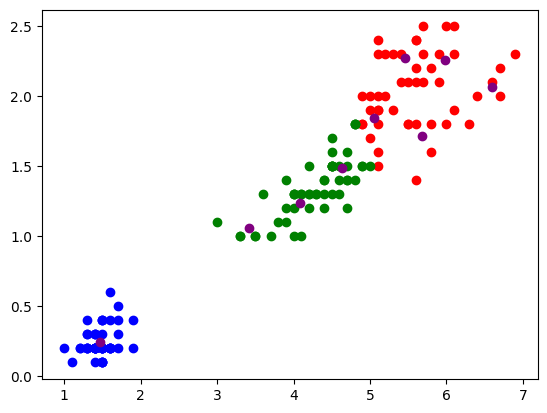

In [29]:
plt.scatter(df0["PetalLengthCm"], df0["PetalWidthCm"], color="red")
plt.scatter(df1["PetalLengthCm"], df1["PetalWidthCm"], color="blue")
plt.scatter(df2["PetalLengthCm"], df2["PetalWidthCm"], color="green")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="purple", label="clusters")

In [25]:
sse = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(df)
    sse.append(model.inertia_)
    

C:\Users\ok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ok\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1

Text(0, 0.5, 'Sum of Squared Error')

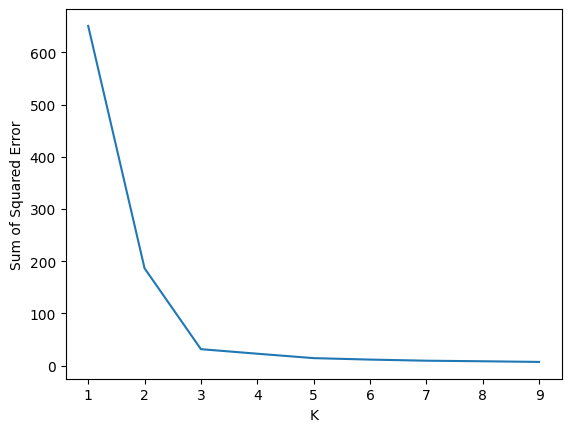

In [28]:
plt.plot(range(1, 10), sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")